In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Classified Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [5]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [6]:
df.drop(['Unnamed: 0'] , axis=1,inplace=True)

## Modelling

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
feature = df.drop(['TARGET CLASS'],axis=1)
target = df['TARGET CLASS']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(feature,target, test_size=0.2 , random_state=101)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors=3)

In [12]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## Evaluation

In [13]:
prediction = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [15]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       106
           1       0.94      0.93      0.93        94

   micro avg       0.94      0.94      0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



## Finding the best K

In [16]:
accuracy_scores = []
k = []
for item in range(1,41):
    model = KNeighborsClassifier(n_neighbors=item)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    accuracy_scores.append(accuracy)
    k.append(item)

In [17]:
pd.DataFrame({'K' : k , 'Accuracy' : accuracy_scores}).sort_values(by=['Accuracy'],ascending=False).head()

,K,Accuracy
30,31,0.955
15,16,0.955
26,27,0.955
28,29,0.955
33,34,0.955


# KNN with n_neighbors = 16

In [18]:
model = KNeighborsClassifier(n_neighbors=16)

In [19]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [20]:
prediction = model.predict(X_test)

In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.95      0.96      0.95        94

   micro avg       0.95      0.95      0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



## Breast Cancer

In [22]:
from sklearn.datasets import load_breast_cancer

In [23]:
data = load_breast_cancer()

In [24]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
x = pd.DataFrame(data['data'],columns=data['feature_names'])

In [26]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [27]:
y = pd.DataFrame(data['target'],columns=['target'])['target'].map({0:'malignant' , 1:'benign'})

## Modelling Without Standarize Features

In [28]:
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [29]:
model_cancer = KNeighborsClassifier(n_neighbors=3)

In [30]:
model_cancer.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## Evaluation

In [31]:
prediction = model_cancer.predict(X_test)

In [32]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      benign       0.92      0.97      0.95        72
   malignant       0.95      0.86      0.90        42

   micro avg       0.93      0.93      0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



## Standarize the Features

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
data_scaled =scaler.fit_transform(x)

In [36]:
x_scaled= pd.DataFrame(data_scaled,columns=x.columns)

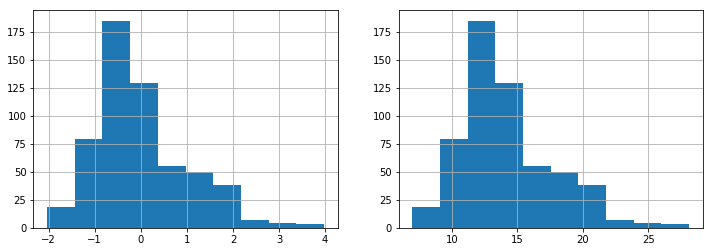

In [37]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
x_scaled['mean radius'].hist(ax=ax[0])
x['mean radius'].hist(ax=ax[1])

## Modelling With Standarized features 

In [38]:
model_scaled = KNeighborsClassifier(n_neighbors=3)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=101)

In [40]:
model_scaled.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## Evaluation 

In [41]:
prediction = model_scaled.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      benign       0.95      0.99      0.97        72
   malignant       0.97      0.90      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Find the Best K

In [42]:
accuracy_scores = []
k = []
for item in range(1,41):
    model = KNeighborsClassifier(n_neighbors=item)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    accuracy_scores.append(accuracy)
    k.append(item)

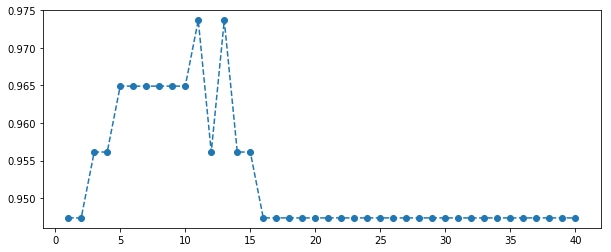

In [49]:
plt.figure(figsize=(10,4))
plt.plot(k,accuracy_scores,linestyle='dashed',marker='o')